<a href="https://colab.research.google.com/github/ArjavMehta01/Truist-Credit_Risk_SAS/blob/Nishang/categorical_vs_continuous_del.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdate


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
de = pd.read_csv('/content/drive/My Drive/summer project/Copy of train_DEL.csv')
#de['Act_date']= pd.to_datetime(de['Act_date'],format= '%m/%d/%y') 
de


,Loan_id,Orig_amt,Orig_dte,Oltv,Dti,Cscore_b,Fthb_flg,Purpose,Prop_typ,Num_unit,Occ_stat,Act_date,Curr_rte,Act_upb,Loan_age,Next_stat,GDP,HS,UMP,PPI,HPI,yqtr
0,100193915350,119000,04/01/09,71,41.0,789,N,R,SF,1,P,06/01/15,4.500,105986.13,73,DEL,18219.405,1205,5.3,194.8,171.467,2015Q2
1,100193915350,119000,04/01/09,71,41.0,789,N,R,SF,1,P,09/01/15,4.500,105367.28,76,DEL,18344.713,1224,5.0,189.1,173.847,2015Q3
2,100193915350,119000,04/01/09,71,41.0,789,N,R,SF,1,P,12/01/15,4.500,104950.84,79,DEL,18350.825,1146,5.0,183.5,176.598,2015Q4
3,100413254871,90000,11/01/08,67,47.0,696,N,R,CO,1,P,10/01/10,6.375,87610.83,22,CUR,15240.843,543,9.4,186.6,142.526,2010Q4
4,100413254871,90000,11/01/08,67,47.0,696,N,R,CO,1,P,04/01/11,6.375,87031.41,28,CUR,15496.189,554,9.1,203.1,140.006,2011Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11756,998908346394,133000,02/01/06,89,55.0,688,N,C,SF,1,P,09/01/07,6.125,123856.29,19,CUR,14535.003,1183,4.7,173.5,177.567,2007Q3
11757,999238630268,166000,10/01/08,95,42.0,682,Y,P,SF,1,P,12/01/09,6.750,164576.59,13,SDQ,14628.021,581,9.9,178.1,147.935,2009Q4
11758,999557110284,75000,04/01/11,41,41.0,758,N,C,SF,1,P,06/01/13,4.875,69524.67,25,CUR,16637.926,839,7.5,204.3,154.202,2013Q2
11759,999955193848,264000,04/01/07,80,37.0,660,N,C,SF,1,P,12/01/09,5.875,254300.44,31,CUR,14628.021,581,9.9,178.1,147.935,2009Q4


In [4]:
de['p']= de.Next_stat.apply(lambda x: x=="SDQ")
de['p'] = de['p']*1
#%
de['p'] = de['p']*100

de.head()


,Loan_id,Orig_amt,Orig_dte,Oltv,Dti,Cscore_b,Fthb_flg,Purpose,Prop_typ,Num_unit,Occ_stat,Act_date,Curr_rte,Act_upb,Loan_age,Next_stat,GDP,HS,UMP,PPI,HPI,yqtr,p
0,100193915350,119000,04/01/09,71,41.0,789,N,R,SF,1,P,06/01/15,4.500,105986.13,73,DEL,18219.405,1205,5.3,194.8,171.467,2015Q2,0
1,100193915350,119000,04/01/09,71,41.0,789,N,R,SF,1,P,09/01/15,4.500,105367.28,76,DEL,18344.713,1224,5.0,189.1,173.847,2015Q3,0
2,100193915350,119000,04/01/09,71,41.0,789,N,R,SF,1,P,12/01/15,4.500,104950.84,79,DEL,18350.825,1146,5.0,183.5,176.598,2015Q4,0
3,100413254871,90000,11/01/08,67,47.0,696,N,R,CO,1,P,10/01/10,6.375,87610.83,22,CUR,15240.843,543,9.4,186.6,142.526,2010Q4,0
4,100413254871,90000,11/01/08,67,47.0,696,N,R,CO,1,P,04/01/11,6.375,87031.41,28,CUR,15496.189,554,9.1,203.1,140.006,2011Q2,0


In [5]:
def flag(state):
  if state == 'PPY':
    return '-1'
  elif state == 'CUR':
    return '0'
  elif state == 'DEL':
    return '1'
  else:
    return '2'

de['flag'] = de['Next_stat'].map(flag)

de.head()

,Loan_id,Orig_amt,Orig_dte,Oltv,Dti,Cscore_b,Fthb_flg,Purpose,Prop_typ,Num_unit,Occ_stat,Act_date,Curr_rte,Act_upb,Loan_age,Next_stat,GDP,HS,UMP,PPI,HPI,yqtr,p,flag
0,100193915350,119000,04/01/09,71,41.0,789,N,R,SF,1,P,06/01/15,4.500,105986.13,73,DEL,18219.405,1205,5.3,194.8,171.467,2015Q2,0,1
1,100193915350,119000,04/01/09,71,41.0,789,N,R,SF,1,P,09/01/15,4.500,105367.28,76,DEL,18344.713,1224,5.0,189.1,173.847,2015Q3,0,1
2,100193915350,119000,04/01/09,71,41.0,789,N,R,SF,1,P,12/01/15,4.500,104950.84,79,DEL,18350.825,1146,5.0,183.5,176.598,2015Q4,0,1
3,100413254871,90000,11/01/08,67,47.0,696,N,R,CO,1,P,10/01/10,6.375,87610.83,22,CUR,15240.843,543,9.4,186.6,142.526,2010Q4,0,0
4,100413254871,90000,11/01/08,67,47.0,696,N,R,CO,1,P,04/01/11,6.375,87031.41,28,CUR,15496.189,554,9.1,203.1,140.006,2011Q2,0,0


In [ ]:
prime = de.loc[de['Cscore_b'] >= 760]
sub_prime = de.loc[de['Cscore_b'] < 760]


In [ ]:
'''test sample 
de_table = pd.pivot_table(de,index=["Orig_amt"],values=["p"],aggfunc=np.mean)
de_table=de_table.replace(np.nan,0)
plt.plot(de_table.index,de_table.values,'o',label='Orig_amt')

In [ ]:
def plot(dataset,variable):
  fig.add_subplot()
  de_table = pd.pivot_table(dataset,index=[variable],values=["p"],aggfunc=np.mean)
  de_table=de_table.replace(np.nan,0)
  plt.plot(de_table.index,de_table.values,'o')
  plt.ylabel('Probability of Default')
  plt.title(variable + '  ' +'data analysis')
  plt.show()

In [ ]:

columns = ['Orig_amt',  'Oltv', 'Dti', 'Cscore_b', 'Fthb_flg', 'Purpose', 'Prop_typ', 'Occ_stat', 'Num_unit', 
       'Curr_rte', 'Act_upb', 'Loan_age', 'GDP', 'HS', 'UMP','PPI', 'HPI']
n=len(columns)
n

17

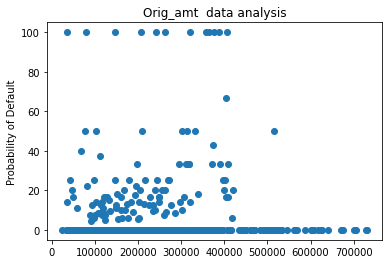

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


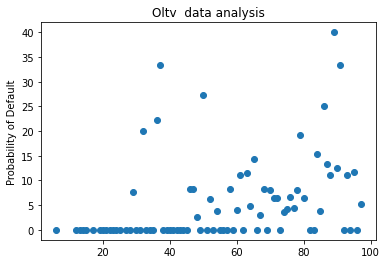

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


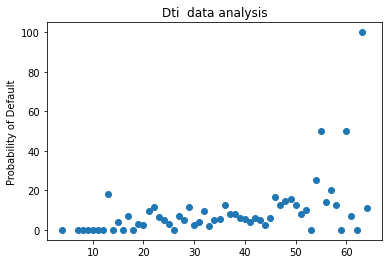

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


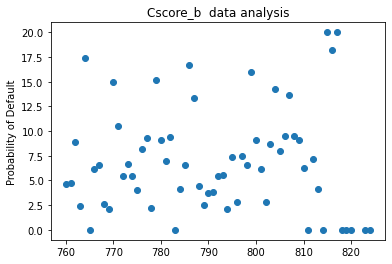

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


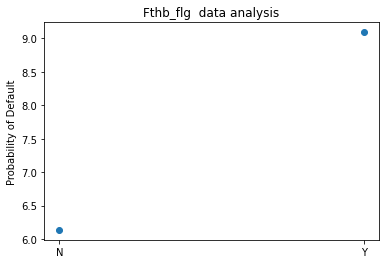

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


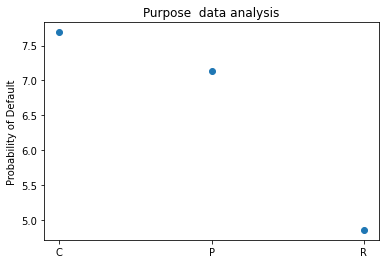

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


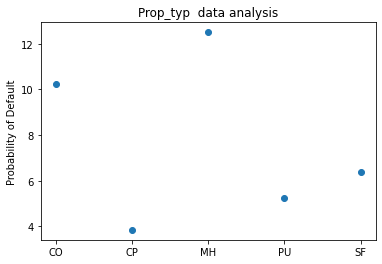

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


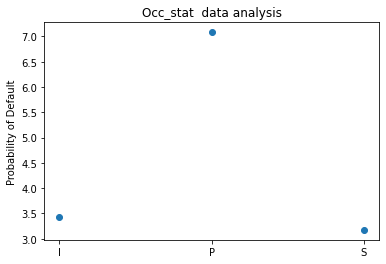

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


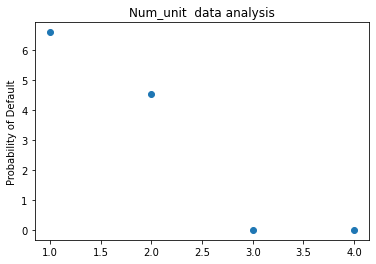

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


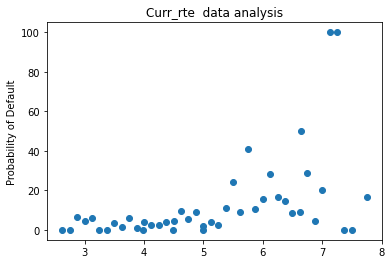

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


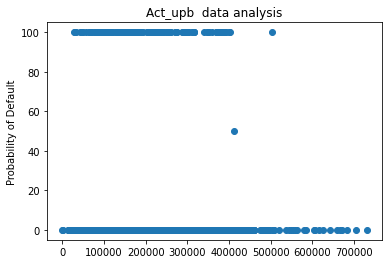

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


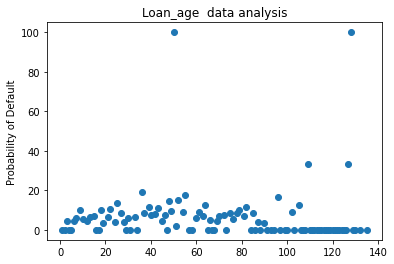

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


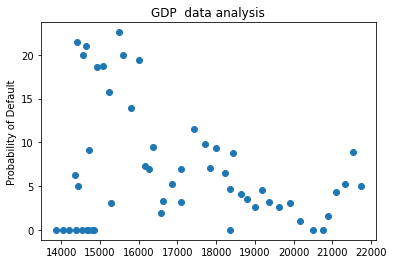

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


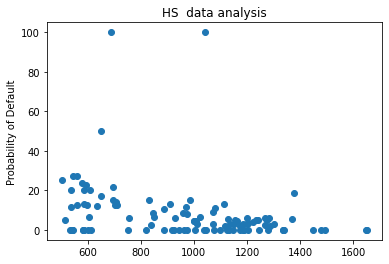

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


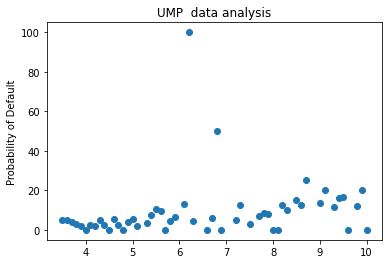

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


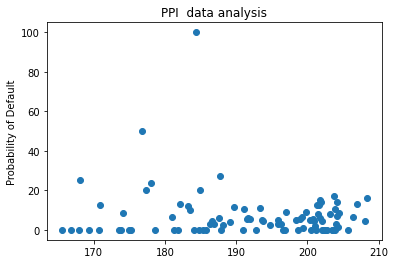

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


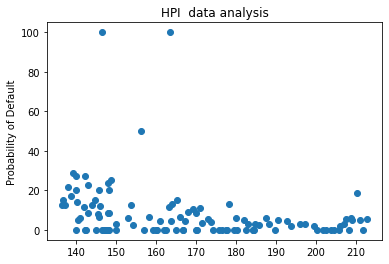

In [ ]:
fig = plt.figure(1)
for i in range(0,n): 
  col = columns[i]
  plot(prime, col)
  fig.savefig('multipleplots_sub_prime.png')

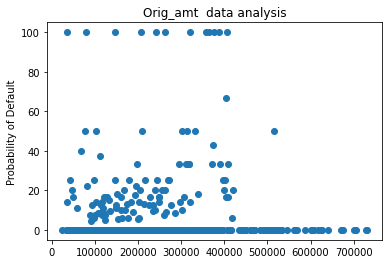

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


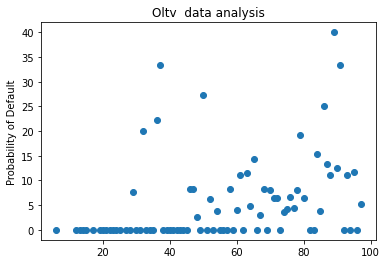

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


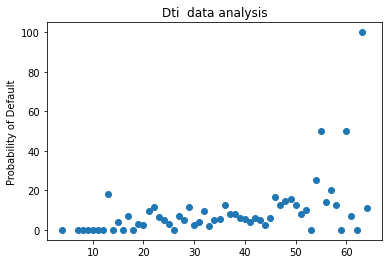

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


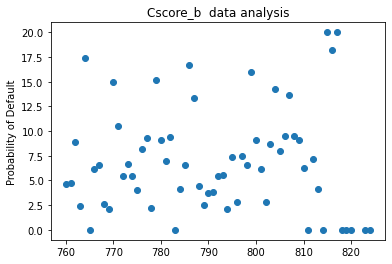

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


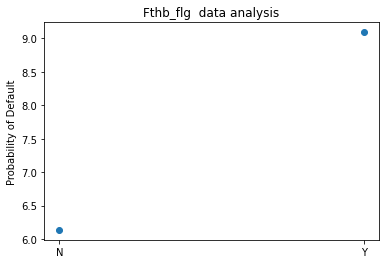

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


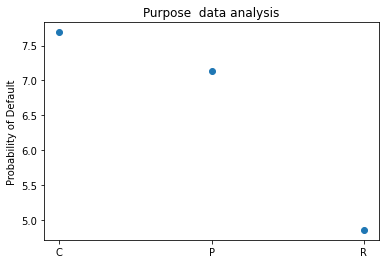

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


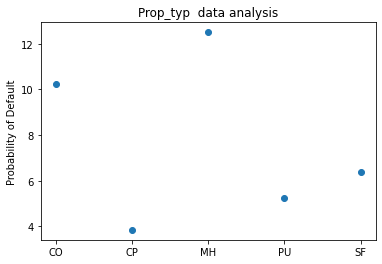

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


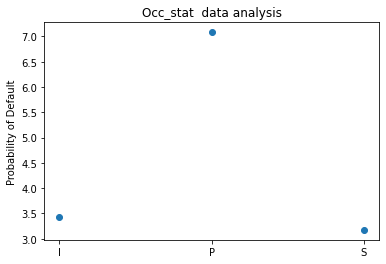

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


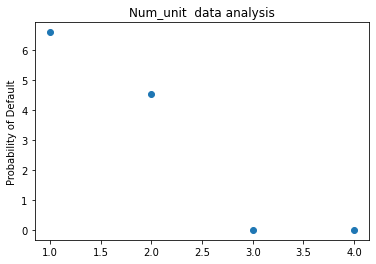

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


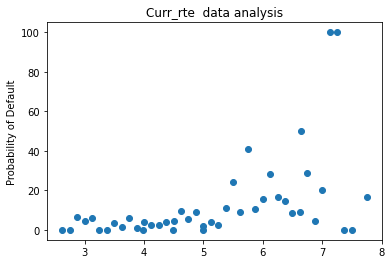

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


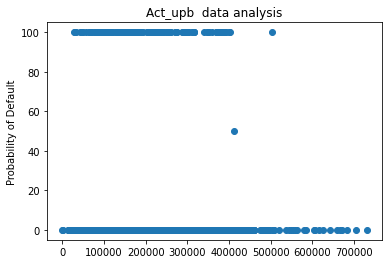

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


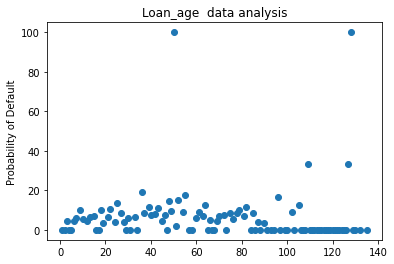

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


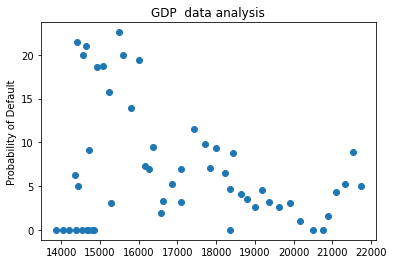

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


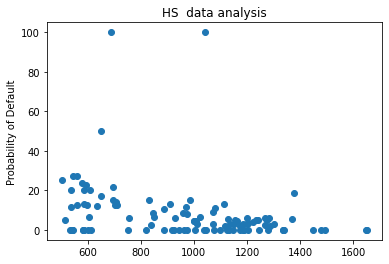

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


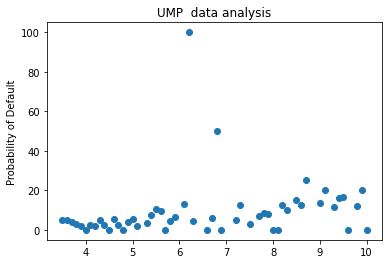

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


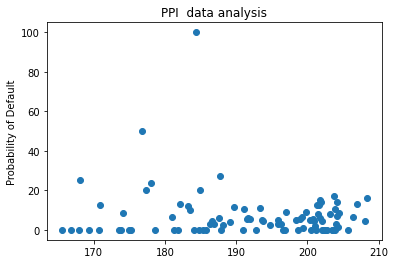

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


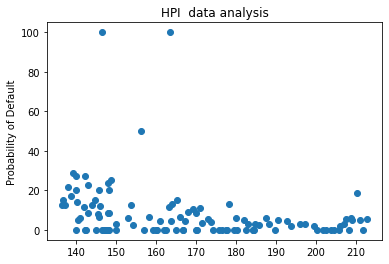

In [ ]:
fig = plt.figure(2)
for col in columns: 
  plot(prime, col)
  fig.savefig('multipleplots_prime.png')


In [22]:
de = de.drop(['Loan_id','Orig_dte','Act_date','Next_stat','yqtr','p'],axis=1)

In [23]:
prime = de.loc[de['Cscore_b'] >= 760]
sub_prime = de.loc[de['Cscore_b'] < 760]


In [105]:
prime

,Orig_amt,Oltv,Dti,Cscore_b,Fthb_flg,Purpose,Prop_typ,Num_unit,Occ_stat,Curr_rte,Act_upb,Loan_age,GDP,HS,UMP,PPI,HPI,flag
0,119000,71,41.0,789,N,R,SF,1,P,4.500,105986.13,73,18219.405,1205,5.3,194.8,171.467,1
1,119000,71,41.0,789,N,R,SF,1,P,4.500,105367.28,76,18344.713,1224,5.0,189.1,173.847,1
2,119000,71,41.0,789,N,R,SF,1,P,4.500,104950.84,79,18350.825,1146,5.0,183.5,176.598,1
23,96000,60,38.0,766,N,R,SF,1,P,5.000,79220.60,43,16257.151,847,7.8,204.4,142.908,0
27,189000,90,42.0,773,N,P,CO,1,S,5.875,143959.09,97,18991.883,1267,4.7,188.2,185.790,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11690,315000,78,41.0,791,N,C,PU,1,P,4.875,270605.37,96,19918.910,1199,4.1,196.3,197.194,1
11712,278000,95,39.0,768,N,P,PU,1,P,3.625,262707.37,31,18350.825,1146,5.0,183.5,176.598,0
11735,152000,95,29.0,774,N,R,SF,1,P,5.000,152000.00,4,16152.257,757,8.2,199.8,141.027,0
11736,343000,80,29.0,807,Y,P,CO,1,P,4.250,322892.84,33,20510.177,1190,4.0,204.2,202.380,0


In [25]:
sample2_Pri = prime
sample2_Pri.columns

Index(['Orig_amt', 'Oltv', 'Dti', 'Cscore_b', 'Fthb_flg', 'Purpose',
       'Prop_typ', 'Num_unit', 'Occ_stat', 'Curr_rte', 'Act_upb', 'Loan_age',
       'GDP', 'HS', 'UMP', 'PPI', 'HPI', 'flag'],
      dtype='object')

In [115]:

sampleNext = prime.loc[:,['Orig_amt', 'Oltv', 'Dti', 'Cscore_b', 'Fthb_flg', 'Purpose',
       'Prop_typ', 'Num_unit', 'Occ_stat', 'Curr_rte', 'Act_upb', 'Loan_age',
       'GDP', 'HS', 'UMP', 'PPI', 'HPI', 'flag']]
sampledes = sampleNext.describe()

dummy_Purpose = pd.get_dummies(sampleNext['Purpose'], prefix = 'Purpose')
dummy_Purpose = dummy_Purpose.drop(['Purpose_C'],axis = 1)

dummy_Prop_typ = pd.get_dummies(sampleNext['Prop_typ'], prefix = 'Prop_typ')
dummy_Prop_typ = dummy_Prop_typ.drop(['Prop_typ_CO'],axis = 1)

dummy_Occ_stat = pd.get_dummies(sampleNext['Occ_stat'], prefix = 'Occ_stat')
dummy_Occ_stat = dummy_Occ_stat.drop(['Occ_stat_I'],axis = 1)

dummy_Fthb_flg = pd.get_dummies(sampleNext['Fthb_flg'], prefix = 'Fthb_flg')
dummy_Fthb_flg = dummy_Fthb_flg.drop(['Fthb_flg_N'],axis = 1)

dummy_Num_unit = pd.get_dummies(sampleNext['Num_unit'], prefix = 'Num_unit')
dummy_Num_unit = dummy_Num_unit.drop(['Num_unit_1'],axis = 1)


sampleNext = pd.concat([sampleNext, dummy_Purpose, dummy_Prop_typ, dummy_Occ_stat, dummy_Fthb_flg, dummy_Num_unit], axis = 1)

sampleNext = sampleNext.drop(['Purpose','Prop_typ', 'Occ_stat', 'Fthb_flg', 'Num_unit'],axis = 1)


In [116]:
sampleNext.columns

Index(['Orig_amt', 'Oltv', 'Dti', 'Cscore_b', 'Curr_rte', 'Act_upb',
       'Loan_age', 'GDP', 'HS', 'UMP', 'PPI', 'HPI', 'flag', 'Purpose_P',
       'Purpose_R', 'Prop_typ_CP', 'Prop_typ_MH', 'Prop_typ_PU', 'Prop_typ_SF',
       'Occ_stat_P', 'Occ_stat_S', 'Fthb_flg_Y', 'Num_unit_2', 'Num_unit_3',
       'Num_unit_4'],
      dtype='object')

In [117]:
sampleNext=sampleNext.drop([  'Purpose_P', 'Purpose_R', 'Occ_stat_P', 'Occ_stat_S', 'Fthb_flg_Y', 'Num_unit_2', 'Num_unit_3',
       'Num_unit_4'], axis=1)

In [118]:
sampleNext.columns

Index(['Orig_amt', 'Oltv', 'Dti', 'Cscore_b', 'Curr_rte', 'Act_upb',
       'Loan_age', 'GDP', 'HS', 'UMP', 'PPI', 'HPI', 'flag', 'Prop_typ_CP',
       'Prop_typ_MH', 'Prop_typ_PU', 'Prop_typ_SF'],
      dtype='object')

In [119]:
#standardlized some of the Macro(equal scale & converge problem)
sampleNext['GDP'] = sampleNext['GDP'].map(lambda x: (x - sampledes['GDP']['mean'])/sampledes['GDP']['std'])
sampleNext['HS'] = sampleNext['HS'].map(lambda x: (x - sampledes['HS']['mean'])/sampledes['HS']['std'])


In [114]:
#Logistic Regression simple
sampleNext = sampleNext.dropna()
dy2 = sampleNext['flag']
dx2 = sampleNext[['Oltv','Cscore_b','Curr_rte','Loan_age','HPI']]
import statsmodels.api as st
mdl = st.MNLogit(dy2, dx2)
mdl_fit = mdl.fit()
print (mdl_fit.summary())

Optimization terminated successfully.
         Current function value: 0.948046
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:                   flag   No. Observations:                 2212
Model:                        MNLogit   Df Residuals:                     2197
Method:                           MLE   Df Model:                           12
Date:                Fri, 26 Jun 2020   Pseudo R-squ.:                 0.05324
Time:                        12:12:22   Log-Likelihood:                -2097.1
converged:                       True   LL-Null:                       -2215.0
Covariance Type:            nonrobust   LLR p-value:                 1.213e-43
    flag=0       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Oltv           0.0130      0.005      2.427      0.015       0.002       0.023
Cscore_b       0.0047      0.

In [120]:
#Logistic Regression
sampleNext = sampleNext.dropna()
dy = sampleNext['flag']
dx = sampleNext.drop(['flag'],axis = 1)
import statsmodels.api as st
mdl = st.MNLogit(dy, dx)
mdl_fit = mdl.fit()
print(mdl_fit.summary())

         Current function value: 0.924879
         Iterations: 35


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                          MNLogit Regression Results                          
Dep. Variable:                   flag   No. Observations:                 2212
Model:                        MNLogit   Df Residuals:                     2164
Method:                           MLE   Df Model:                           45
Date:                Fri, 26 Jun 2020   Pseudo R-squ.:                 0.07637
Time:                        12:18:32   Log-Likelihood:                -2045.8
converged:                      False   LL-Null:                       -2215.0
Covariance Type:            nonrobust   LLR p-value:                 1.322e-46
     flag=0       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Orig_amt     8.049e-07   5.55e-06      0.145      0.885   -1.01e-05    1.17e-05
Oltv            0.0121      0.006      2.152      0.031       0.001       0.023
Dti             0.0085      0.010      0.852    

In [64]:
prime.columns

Index(['Orig_amt', 'Oltv', 'Dti', 'Cscore_b', 'Fthb_flg', 'Purpose',
       'Prop_typ', 'Num_unit', 'Occ_stat', 'Curr_rte', 'Act_upb', 'Loan_age',
       'GDP', 'HS', 'UMP', 'PPI', 'HPI', 'flag'],
      dtype='object')

In [94]:
sampleNext = prime.loc[:,['Orig_amt', 'Oltv', 'Dti', 'Cscore_b', 'Fthb_flg', 'Purpose',
       'Prop_typ', 'Num_unit', 'Occ_stat', 'Curr_rte', 'Act_upb', 'Loan_age',
       'GDP', 'HS', 'UMP', 'PPI', 'HPI', 'flag']]
sampleNext['Orig_amt'] = pd.cut(sampleNext['Orig_amt'], 5)
sampleNext['Cscore_b'] = pd.cut(sampleNext['Cscore_b'], 5)


sampleNext.head()

,Orig_amt,Oltv,Dti,Cscore_b,Fthb_flg,Purpose,Prop_typ,Num_unit,Occ_stat,Curr_rte,Act_upb,Loan_age,GDP,HS,UMP,PPI,HPI,flag
0,"(24295.0, 166000.0]",71,41.0,"(785.6, 798.4]",N,R,SF,1,P,4.500,105986.13,73,18219.405,1205,5.3,194.8,171.467,1
1,"(24295.0, 166000.0]",71,41.0,"(785.6, 798.4]",N,R,SF,1,P,4.500,105367.28,76,18344.713,1224,5.0,189.1,173.847,1
2,"(24295.0, 166000.0]",71,41.0,"(785.6, 798.4]",N,R,SF,1,P,4.500,104950.84,79,18350.825,1146,5.0,183.5,176.598,1
23,"(24295.0, 166000.0]",60,38.0,"(759.936, 772.8]",N,R,SF,1,P,5.000,79220.60,43,16257.151,847,7.8,204.4,142.908,0
27,"(166000.0, 307000.0]",90,42.0,"(772.8, 785.6]",N,P,CO,1,S,5.875,143959.09,97,18991.883,1267,4.7,188.2,185.790,0


In [95]:
sampledes = sampleNext.describe()
#standardlized some of the Macro(equal scale & converge problem)
sampleNext['GDP'] = sampleNext['GDP'].map(lambda x: (x - sampledes['GDP']['mean'])/sampledes['GDP']['std'])
sampleNext['HS'] = sampleNext['HS'].map(lambda x: (x - sampledes['HS']['mean'])/sampledes['HS']['std'])

In [96]:
sampleNext['HPI'] = sampleNext['HPI'].map(lambda x: (x - sampledes['HPI']['mean'])/sampledes['HPI']['std'])

In [68]:
sampleNext['GDP'] = pd.cut(sampleNext['GDP'], 5)
#sampleNext['HS'] = pd.cut(sampleNext['HS'], 5)
#sampleNext['UMP'] = pd.cut(sampleNext['UMP'], 5)
sampleNext['HPI'] = pd.cut(sampleNext['HPI'], 5)

In [97]:
sampleNext=sampleNext.drop([ 'Fthb_flg', 'Purpose', 'Num_unit', 'Occ_stat', 'Loan_age','PPI' ], axis=1)

In [98]:
sampleNext=sampleNext.drop(['HS','UMP' ], axis=1)

In [99]:
sampleNext=sampleNext.drop(['Act_upb' ], axis=1)

In [100]:
sampleNext.columns

Index(['Orig_amt', 'Oltv', 'Dti', 'Cscore_b', 'Prop_typ', 'Curr_rte', 'GDP',
       'HPI', 'flag'],
      dtype='object')

In [101]:

columns = ['Orig_amt', 'Cscore_b', 'Prop_typ']
for col in columns:
  dum = pd.get_dummies(sampleNext[col], prefix = col)
  sampleNext = pd.concat([sampleNext, dum], axis = 1)

sampleNext = sampleNext.drop(columns,axis = 1)


In [102]:
sampleNext.head()

,Oltv,Dti,Curr_rte,GDP,HPI,flag,"Orig_amt_(24295.0, 166000.0]","Orig_amt_(166000.0, 307000.0]","Orig_amt_(307000.0, 448000.0]","Orig_amt_(448000.0, 589000.0]","Orig_amt_(589000.0, 730000.0]","Cscore_b_(759.936, 772.8]","Cscore_b_(772.8, 785.6]","Cscore_b_(785.6, 798.4]","Cscore_b_(798.4, 811.2]","Cscore_b_(811.2, 824.0]",Prop_typ_CO,Prop_typ_CP,Prop_typ_MH,Prop_typ_PU,Prop_typ_SF
0,71,41.0,4.500,0.059238,-0.095374,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,71,41.0,4.500,0.119369,0.004934,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,71,41.0,4.500,0.122302,0.120878,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
23,60,38.0,5.000,-0.882369,-1.299025,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
27,90,42.0,5.875,0.429920,0.508285,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0


In [103]:
#Logistic Regression
sampleNext = sampleNext.dropna()
dy1 = sampleNext['flag']
dx1 = sampleNext.drop(['flag'],axis = 1)
import statsmodels.api as st
mdl = st.MNLogit(dy1, dx1)
mdl_fit = mdl.fit()
print (mdl_fit.summary())

         Current function value: 0.928532
         Iterations: 35


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:4112: RuntimeWarning: invalid value encountered in sqrt
  bse = np.sqrt(np.diag(self.cov_params()))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


                          MNLogit Regression Results                          
Dep. Variable:                   flag   No. Observations:                 2212
Model:                        MNLogit   Df Residuals:                     2158
Method:                           MLE   Df Model:                           51
Date:                Fri, 26 Jun 2020   Pseudo R-squ.:                 0.07273
Time:                        11:56:23   Log-Likelihood:                -2053.9
converged:                      False   LL-Null:                       -2215.0
Covariance Type:            nonrobust   LLR p-value:                 4.945e-41
                       flag=0       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Oltv                              0.0089      0.006      1.585      0.113      -0.002       0.020
Dti                               0.0066      0.010      0.662      0.508 

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.linear_model import ridge_regression
#dx = sampleNext.drop(['NLDS','Lumberprice','new housing','HPI','unemployment rate','Rental Vacancy Rate','Vacant Housing Units for Sale'],axis = 1)
dx = dx.astype('float32') #string-->float

meandx = pd.DataFrame(dx.mean()).T
# np.corrcoef(dx)
regressor = LogisticRegression(multi_class='multinomial', solver='saga',penalty='l1', max_iter=500)
regressor.fit(dx,dy)
#regressorcv = LogisticRegressionCV(cv = 5,multi_class='multinomial').fit(dx,dy)
regressor2 = sm.MNLogit(endog=dy,exog=dx)
regressor2result = regressor2.fit()
regressor2result.summary()

results_summary = regressor2result.summary()
results_as_html = results_summary.tables[1].as_html()
abc = pd.read_html(results_as_html, header = 0, index_col =0)[0]
abc.to_html('CUR_sub1.html')


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:2195: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:2196: RuntimeWarning: invalid value encountered in true_divide
  return eXB/eXB.sum(1)[:,None]
/usr/local/lib/python3.6/dist-packages/statsmodels/base/optimizer.py:299: RuntimeWarning: invalid value encountered in greater
  oldparams) > tol)):


Optimization terminated successfully.
         Current function value: nan
         Iterations 21


/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
